In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import pickle
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import collections
from tensorflow.contrib.learn.python.learn.estimators import model_fn as model_fn_lib
import itertools
from math import sqrt

tf.logging.set_verbosity(tf.logging.INFO)
%matplotlib inline

plt.rcParams["figure.figsize"] = (40,30)

In [7]:
# Functions

# Load Dataset
def load_data(output_path, window_size, compute_RR_interval_feature):
    extension = '_' + str(window_size)
    if compute_RR_interval_feature:
        extension = extension + '_' + 'RR'
        extension = extension + '.csv'

    # Load training and eval data
    train_data = np.loadtxt(output_path + 'train_data' + extension, delimiter=",", dtype=float)
    train_labels =  np.loadtxt(output_path + 'train_label' + extension, delimiter=",",  dtype=np.int32)
    eval_data = np.loadtxt(output_path + 'eval_data' + extension, delimiter=",", dtype=float)
    eval_labels = np.loadtxt(output_path + 'eval_label' + extension, delimiter=",",  dtype=np.int32)

    return (train_data, train_labels, eval_data, eval_labels)

# Normalize data features
def normalize_data(train_data, eval_data):
    feature_size = len(train_data[0])

    max_wav = np.amax(np.vstack((train_data[:, 0:feature_size], eval_data[:, 0:feature_size])))
    min_wav = np.amin(np.vstack((train_data[:, 0:feature_size], eval_data[:, 0:feature_size])))

    train_data[:, 0:feature_size] = ((train_data[:,0:feature_size] - min_wav) / (max_wav - min_wav))
    eval_data[:, 0:feature_size] = ((eval_data[:,0:feature_size] - min_wav) / (max_wav - min_wav))

    return (train_data, eval_data)

# Train Inputs
def get_train_inputs():
    x = tf.constant(train_data)
    y = tf.constant(train_labels)
    return x, y

# Test Inputs
def get_test_inputs():
    x = tf.constant(eval_data)
    y = tf.constant(eval_labels)
    return x, y

# Eval data
def get_eval_data():
    return np.array(eval_data, dtype=np.float32)

# Plot matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        #cm[i, j] = 0 if np.isnan(cm[i, j]) else cm[i, j]
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

=======INPUT=======
Counter({0: 38065, 1: 3946, 2: 3778, 9: 3683, 5: 809, 11: 414, 10: 105, 6: 100, 7: 32, 4: 16, 3: 16, 8: 2})
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000201800DB438>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\soma\\AppData\\Local\\Temp\\tmpl90bdrz7'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local

INFO:tensorflow:loss = 0.2291787, step = 7000 (0.431 sec)
INFO:tensorflow:global_step/sec: 238.648
INFO:tensorflow:loss = 0.22593868, step = 7100 (0.418 sec)
INFO:tensorflow:global_step/sec: 223.229
INFO:tensorflow:loss = 0.22431715, step = 7200 (0.449 sec)
INFO:tensorflow:global_step/sec: 245.077
INFO:tensorflow:loss = 0.22059931, step = 7300 (0.407 sec)
INFO:tensorflow:global_step/sec: 232.037
INFO:tensorflow:loss = 0.21879664, step = 7400 (0.433 sec)
INFO:tensorflow:global_step/sec: 243.292
INFO:tensorflow:loss = 0.22288261, step = 7500 (0.411 sec)
INFO:tensorflow:global_step/sec: 234.207
INFO:tensorflow:loss = 0.21179529, step = 7600 (0.427 sec)
INFO:tensorflow:global_step/sec: 233.1
INFO:tensorflow:loss = 0.21007319, step = 7700 (0.427 sec)
INFO:tensorflow:global_step/sec: 229.358
INFO:tensorflow:loss = 0.20857318, step = 7800 (0.437 sec)
INFO:tensorflow:global_step/sec: 228.832
INFO:tensorflow:loss = 0.21055144, step = 7900 (0.437 sec)
INFO:tensorflow:global_step/sec: 243.905
INF

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\soma\AppData\Local\Temp\tmpl90bdrz7\model.ckpt-15000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-10-14-15:11:33
INFO:tensorflow:Saving dict for global step 15000: accuracy = 0.7338905, global_step = 15000, loss = 1.3361455

Test Accuracy: 0.733890

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\soma\AppData\Local\Temp\tmpl90bdrz7\model.ckpt-15000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


C:\Users\soma\Anaconda3\envs\signalus\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in true_divide
C:\Users\soma\Anaconda3\envs\signalus\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


Normalized confusion matrix


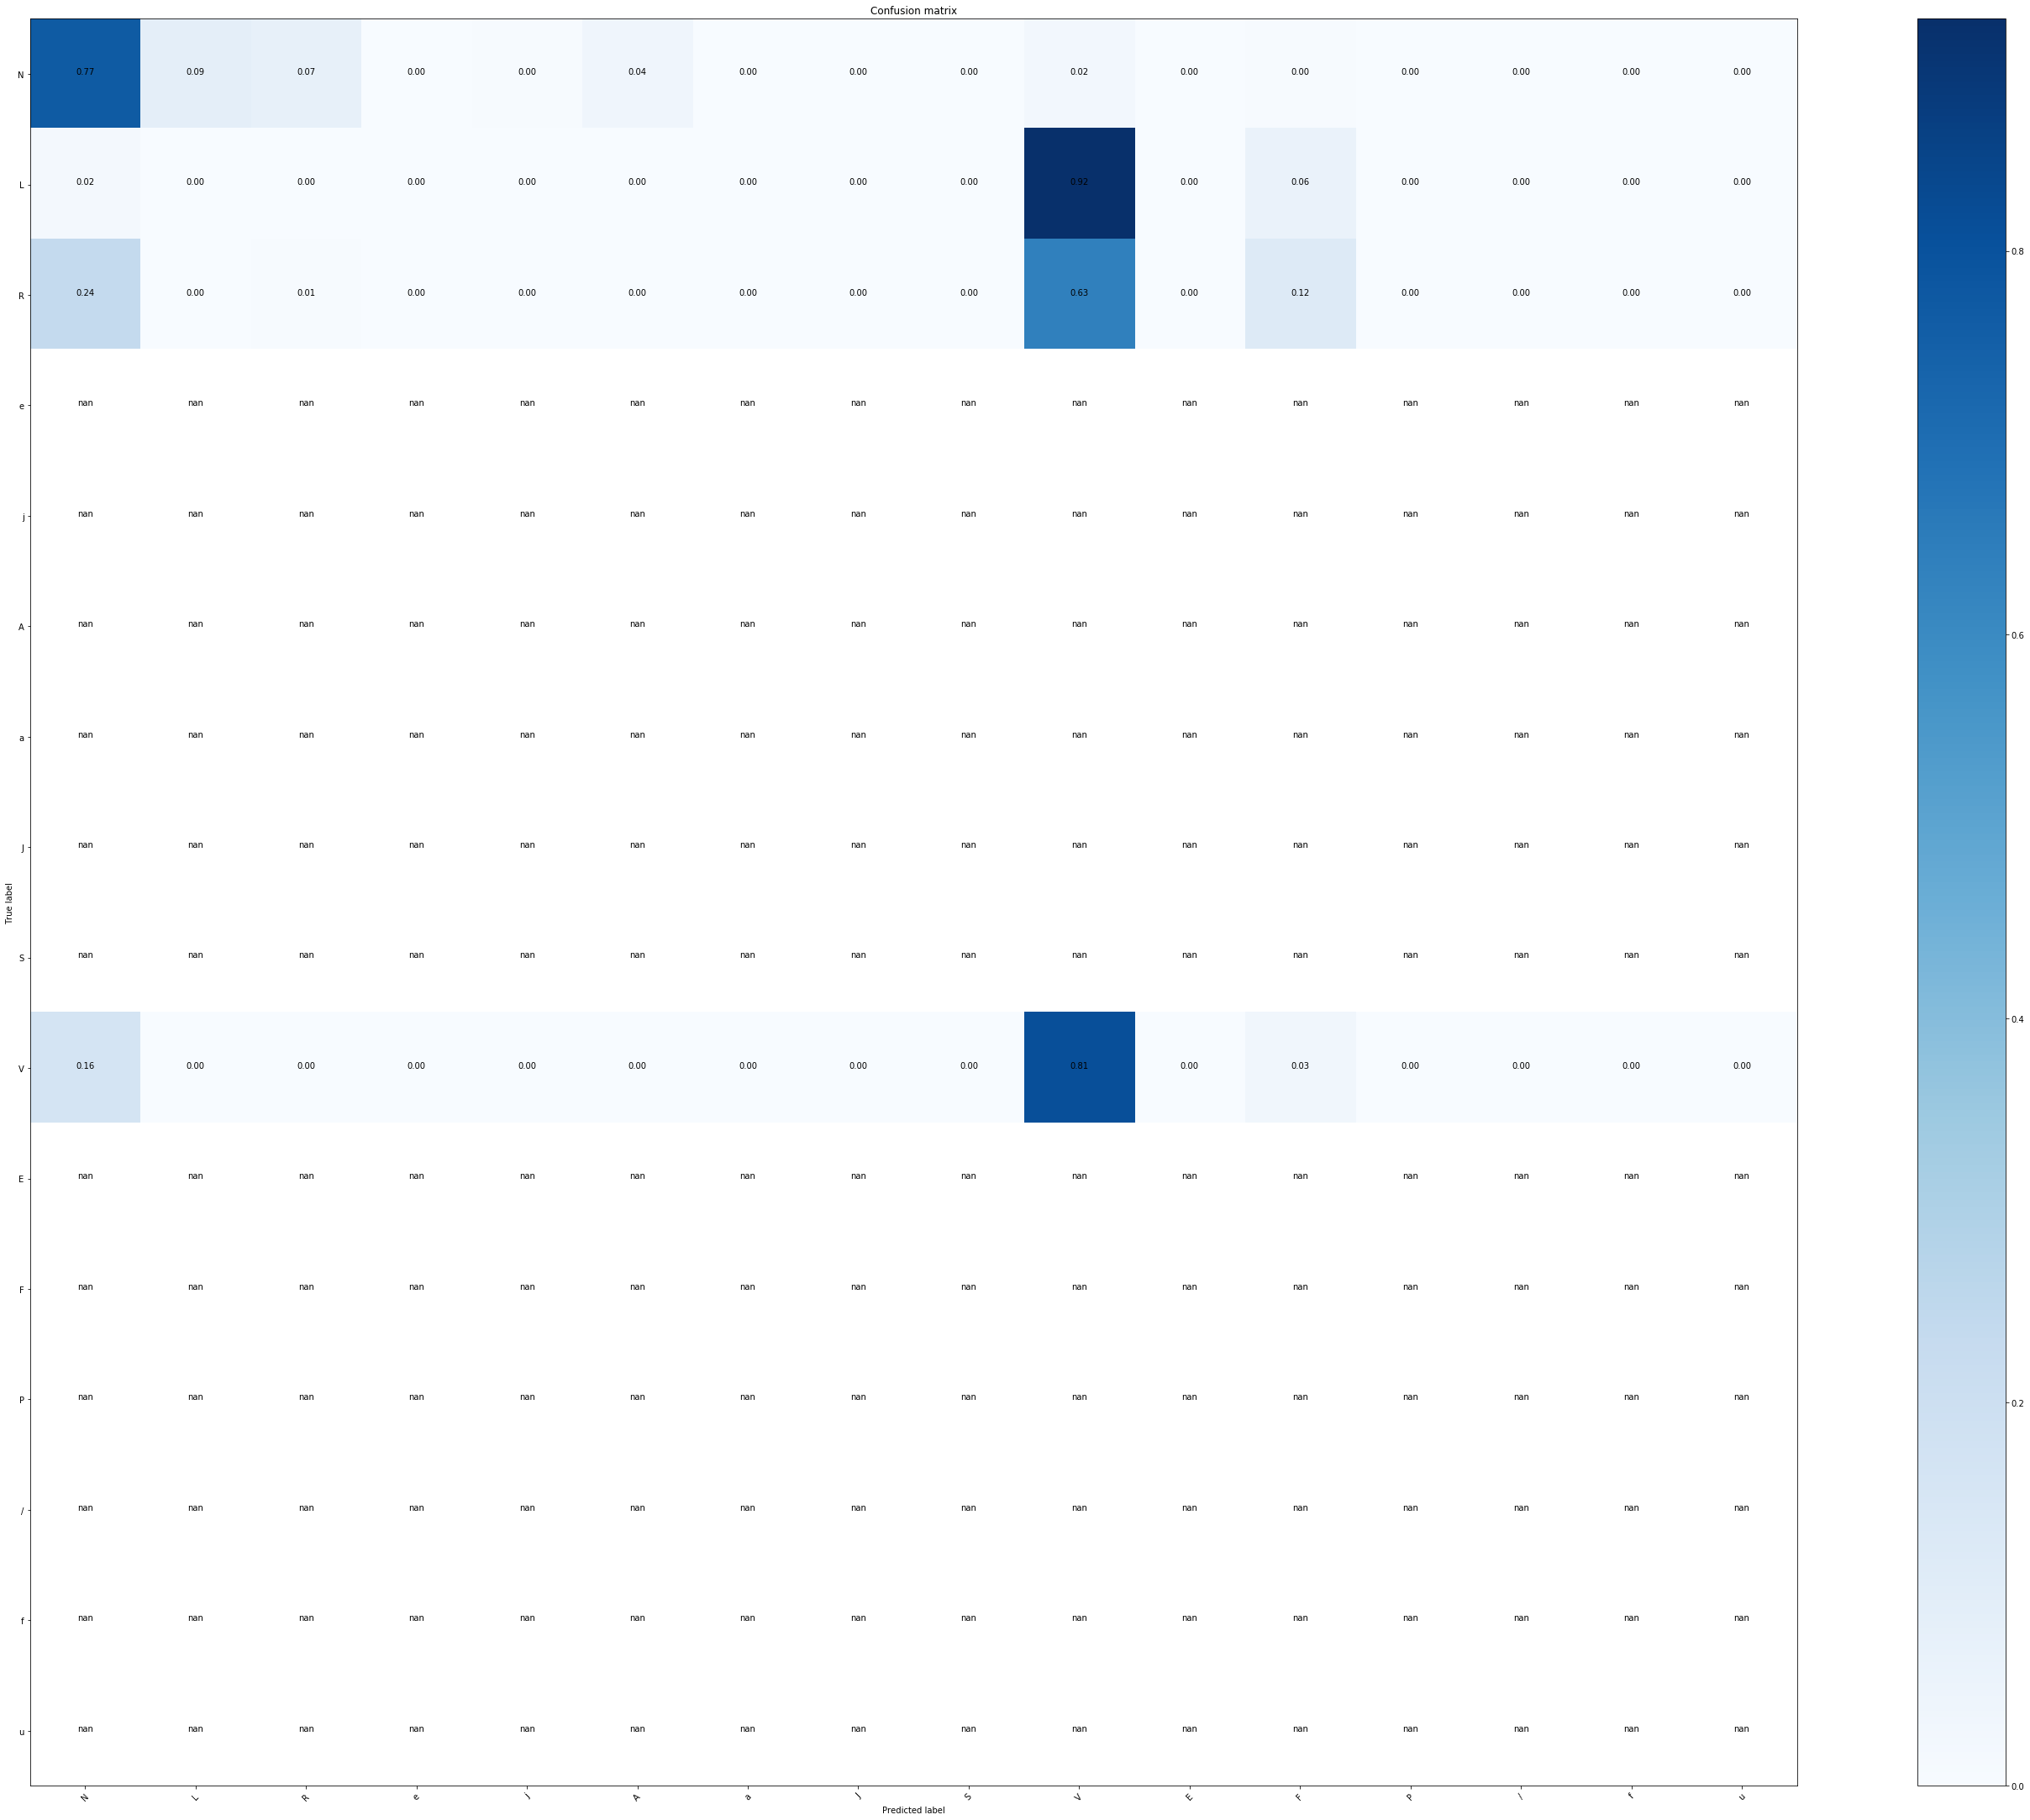

In [25]:
window_size = 160
compute_RR_interval_feature = True
dataset = 'mit_db/'
output_path = 'trainedDataSet/'
weight_imbalanced = True
class_names = ['N', 'L', 'R', 'e', 'j', 'A', 'a', 'J', 'S', 'V', 'E', 'F', 'P', '/', 'f', 'u']
"""
Arrhythmia Type List

N = 'N', 'L', 'R', 'e', 'j'
SVEB = 'A', 'a', 'J', 'S'
VEB = 'V', 'E'
F = 'F'
Q = 'P', '/', 'f', 'u'
"""


# 0 Load Data
train_data, train_labels, eval_data, eval_labels = load_data(output_path, window_size, compute_RR_interval_feature)

# 1 Preprocess data. Normalize. if RR interval, last 4 features are pre, post, local and global RR
train_data, eval_data =  normalize_data(train_data, eval_data)

# 2 Create my own model
LEARNING_RATE = 0.001 # Learning rate for the model
num_classes = len(class_names) # Output Classes
weights = np.random.randn(len(train_labels)) / sqrt(len(train_labels) / 2) # He’s initialization

# Set model params
count = collections.Counter(train_labels)
print("=======INPUT=======")
print(count)

# Specify that all features have real-value data
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=len(train_data[0]))]

# Build 3 layer DNN with 10, 20, 10 units respectively.
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,
                                        hidden_units=[20,30,30,20], # TODO
                                        n_classes=num_classes)
                                        # optimizer is one of 'Adagrad', 'Adam', 'Ftrl', 'RMSProp', 'SGD'

# Fit model.
classifier.fit(input_fn=get_train_inputs, steps=15000) # TODO

# Evaluate accuracy. 
accuracy_score = classifier.evaluate(input_fn=get_test_inputs, steps=1)["accuracy"]
print("\nTest Accuracy: {0:f}\n".format(accuracy_score))

predictions = classifier.predict(input_fn=get_eval_data, as_iterable=False)

# Compute the matrix confussion
confusion_matrix = np.zeros((num_classes,num_classes), dtype='int')

for p in range(0, len(predictions)):
    confusion_matrix[predictions[p]][eval_labels[p]] = confusion_matrix[predictions[p]][eval_labels[p]] + 1
                                     
plt.figure()
plot_confusion_matrix(confusion_matrix, classes=class_names, normalize=True,
                    title='Confusion matrix')
plt.show()